# Lab Extension 2 : Topic Models on Harry Potter Books

In this lab, we'll apply Latent Dirichlet Allocation to the text data of the seven Harry Potter Books. The text has been downloaded from https://archive.org/stream/Book5TheOrderOfThePhoenix and will be preprocessed before applying topic modelling and other methods that will explore data. The downloaded text, present in the folder has been modified : titles of chapter have been corrected as there were some errors on them. The files containing the chapter names have also been scraped using http://www.harrypotterfacts.com/_chapters.htm.

# Preprocessing the Data

We want to divide our data into chapter files so that we can extract interesting information such as the evolution of topics through the chapters. The pages appear in the file, we will then first need to remove then. Second we will need to create a new file each time we go to a new chapter. Finally we will remove useless trailing spaces.

In [1]:
import os

chapterToTitles = {}
#Compute the dictionary of chapters
chapter = 1
for i in range(1,8):
    with open("Data/ChaptersBook"+str(i)+".txt") as infile:
        for line in infile.readlines():
            chapterToTitles[chapter]=line.strip()
            chapter = chapter + 1
    infile.close()

titlesToChapter = {value:key for key,value in chapterToTitles.iteritems()}

if not os.path.exists("HarryPotterBookComputedData"):
    os.makedirs("HarryPotterBookComputedData")

print "We have now computed the Dataset to use for our Topic Modelling with the following chapters :","\n"

newBookChapter = []
chapterToBook={}

outfile = None
chapter = 1
for i in range(1,8):
    newBookChapter.append(chapter)
    print "BOOK "+str(i)
    totalChapters = chapter - 1
    with open("Data/HarryPotterBook"+str(i)+".txt","rb") as infile:
        for line in infile.readlines():
            textLine = line.strip().replace("’","'")
            if textLine!="":
                if textLine in titlesToChapter and textLine.isupper() and titlesToChapter[textLine]==chapter:
                    if i==1:
                        print str(i)+"."+str(chapter-totalChapters)+" "+textLine
                    try:
                        outfile.close()
                    except:
                        pass
                    outfile = open("HarryPotterBookComputedData/Chapter"+str(titlesToChapter[textLine])+".txt","wb")
                    chapterToBook[chapter]=i
                    chapter = chapter + 1
                else:
                    if not "Page | " in textLine and not "Rowling" in textLine:
                        outfile.write(textLine+" ")
    infile.close()
outfile.close()

We have now computed the Dataset to use for our Topic Modelling with the following chapters : 

BOOK 1
1.1 THE BOY WHO LIVED
1.2 THE VANISHING GLASS
1.3 THE LETTERS FROM NO ONE
1.4 THE KEEPER OF THE KEYS
1.5 DIAGON ALLEY
1.6 THE JOURNEY FROM PLATFORM NINE AND THREE-QUARTERS
1.7 THE SORTING HAT
1.8 THE POTIONS MASTER
1.9 THE MIDNIGHT DUEL
1.10 HALLOWEEN
1.11 QUIDDITCH
1.12 THE MIRROR OF ERISED
1.13 NICOLAS FLAMEL
1.14 NORBERT THE NORWEGIAN RIDGEBACK
1.15 THE FORBIDDEN FOREST
1.16 THROUGH THE TRAPDOOR
1.17 THE MAN WITH TWO FACES
BOOK 2
BOOK 3
BOOK 4
BOOK 5
BOOK 6
BOOK 7


In [2]:
from glob import glob

#We extract sorted files
files = sorted(glob('HarryPotterBookComputedData\Chapter*.txt'),key=lambda chapter: int(chapter[35:-4]))
#We remove the last chapter as it happens years after the events of the previous chapter. It would add noise to topic modelling
#as the topics addressed in it are not very related to the previous ones
#files = files[:-1]

We then read the text into a numpy array.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(lowercase=True,max_df=0.352,min_df=0.1,input='filename',stop_words='english')

It is to be noted that the parameter max_df is especially important has the most present words will often appear in the computed topic. max_df must be well chosen so that we don't get too common words but also make sure we keep the important ones.

In [4]:
X = vect.fit_transform(files)

In [5]:
X.shape

(199, 2078)

In [6]:
ivoc = {j:i for i,j in vect.vocabulary_.items()}

**Statistics**

1. What are the highest-frequency words in the dataset?
2. How many words are there in the dataset ?

In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.transpose(X.sum(axis=0)),columns=["frequency"])
df['word']=pd.DataFrame.from_dict(ivoc,orient='index')
df = df.sort_values(["frequency","word"],ascending=False)
print df.head(10),"\n"
print "The data is composed of "+str(df["frequency"].sum())+" words."

      frequency      word
1940        629  umbridge
1942        543     uncle
1185        507     moody
1980        505    vernon
738         474     fudge
500         467     dobby
2068        441       yeh
538         434    dudley
1641        432       sir
1666        410  slughorn 

The data is composed of 120740 words.


# Running the topic model

We create a `LatentDirichletAllocation` model before fitting it.

In [8]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10)

After tweaking the parameters for the LDA, the following LDA seems to give meaningfull topics :

In [9]:
lda = LatentDirichletAllocation(max_iter=50,evaluate_every=5,verbose=1,learning_method='batch',random_state=80,n_components=10)
theta = lda.fit_transform(X);

iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50, perplexity: 1715.3605
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50, perplexity: 1625.1401
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50, perplexity: 1596.1581
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50, perplexity: 1581.3037
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50, perplexity: 1571.5552
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_ite

The perplexity is quite low and converges quickly, let us then see what topics we are then given :

In [10]:
def show_topics(lda,ivoc,number_words=10,topics=range(10)):
    for k,topic in enumerate(lda.components_):
        if k in topics:
            print(k+1,[str(ivoc[i]) for i in topic.argsort()[::-1][:number_words]])

In [11]:
show_topics(lda,ivoc)

(1, ['lockhart', 'luna', 'crabbe', 'goyle', 'nick', 'seamus', 'filch', 'headless', 'peeves', 'ravenclaw'])
(2, ['tonks', 'kitchen', 'mundungus', 'prophet', 'hedwig', 'albus', 'moody', 'car', 'rita', 'arthur'])
(3, ['moody', 'crouch', 'cedric', 'krum', 'bagman', 'diggory', 'fleur', 'tournament', 'madame', 'maxime'])
(4, ['yeh', 'ter', 'wood', 'team', 'snitch', 'broom', 'field', 'yer', 'firebolt', 'buckbeak'])
(5, ['umbridge', 'trelawney', 'cho', 'lesson', 'parvati', 'james', 'angelina', 'lavender', 'homework', 'meeting'])
(6, ['fudge', 'minister', 'dementors', 'train', 'scabbers', 'shop', 'crookshanks', 'azkaban', 'trunk', 'alley'])
(7, ['kreacher', 'bellatrix', 'master', 'wormtail', 'sword', 'eater', 'snake', 'luna', 'horcrux', 'fleur'])
(8, ['slughorn', 'riddle', 'sir', 'filch', 'bathroom', 'quirrell', 'chamber', 'map', 'lesson', 'lavender'])
(9, ['dobby', 'sir', 'elf', 'elves', 'master', 'squeaked', 'bludger', 'tea', 'clothes', 'kitchen'])
(10, ['uncle', 'vernon', 'dudley', 'aunt', '

The topics we have are very interesting. Indeed some make sense for people who know well the universe of Harry Potter.
<br>
The third topic refers to the Goblet of Fire Tournament.
<br>
The seventh topic refers to the Horcruxes of Voldemort.
<br>
The ninth topic refers to the elves and Dobby especially.
<br>
The tenth topic refers to Harry's adoptive family.
<br>
<br>
Let us see an example of the distribution of topics over a chapter. To do so, we pick a chapter that has the most entropy, that is, the one where the distribution of the topics is the most balanced, so that we can visualize well different topics within a chapter. The chapter with the most even distribution is then :

In [12]:
def getChapter(chapter):
    return "Book "+str(chapterToBook[chapter])+" Chapter "+str(chapter-newBookChapter[chapterToBook[chapter]-1]+1)+" "+chapterToTitles[chapter]

max_entropy_chapter = np.argmax(-np.multiply(np.log(theta),theta).sum(axis=1))+1
print "Chapter with the highest entropy : ",max_entropy_chapter,"(",getChapter(max_entropy_chapter),")","\n"
print "The corresponding topic distribution is then : ",[float('{0:.2f}'.format(a)) for a in theta[max_entropy_chapter-1,:]]

Chapter with the highest entropy :  57 ( Book 3 Chapter 22 OWL POST AGAIN ) 

The corresponding topic distribution is then :  [0.06, 0.09, 0.0, 0.3, 0.05, 0.28, 0.15, 0.0, 0.0, 0.06]


We will now highlight the text with the 3 topics with highest probability : topic 4, topic 6, topic 7

In [13]:
def highlight(colour, text):
    if colour == "black":
        return "\033[1;40m" + str(text) + "\033[1;m"
    if colour == "red":
        return "\033[1;41m" + str(text) + "\033[1;m"
    if colour == "green":
        return "\033[1;42m" + str(text) + "\033[1;m"
    if colour == "yellow":
        return "\033[1;43m" + str(text) + "\033[1;m"
    if colour == "blue":
        return "\033[1;44m" + str(text) + "\033[1;m"
    if colour == "magenta":
        return "\033[1;45m" + str(text) + "\033[1;m"
    if colour == "cyan":
        return "\033[1;46m" + str(text) + "\033[1;m"
    if colour == "gray":
        return "\033[1;47m" + str(text) + "\033[1;m"
    return str(text)

topicToColor={0:"black",1:"grey",7:"yellow",3:"blue",4:"green",5:"yellow",6:"red",8:"magenta",9:"cyan"}
print "COLORS :","\n",highlight("blue","Topic 4 : Quidditch"),"\n",highlight("yellow","Topic 6 : Minister"),"\n",highlight("red","Topic 7 : Horcrux")

COLORS : 
Topic 4 : Quidditch 
Topic 6 : Minister 
Topic 7 : Horcrux


In [14]:
wordTopic={}
for k,topic in enumerate(lda.components_):
    if k==3 or k==5 or k==6:
        arr = [str(ivoc[i]) for i in topic.argsort()[::-1][:300]]
        for word in arr:
            wordTopic[word]=k
with open (files[max_entropy_chapter-1]) as fin:
    for line in fin.readlines():
        words = line.split()
        for word in words:
            if word.lower() in wordTopic:
                print highlight(topicToColor[wordTopic[word.lower()]],word),
            else:
                print word,

“Harry!” Hermione was tugging at his sleeve, staring at her watch. “We've got exactly ten minutes to get back down to the hospital wing without anybody seeing us — before Dumbledore locks the door — ” “Okay,” said Harry, wrenching his gaze from the sky, “let's go. ...” They slipped through the doorway behind them and down a tightly spiraling stone staircase. As they reached the bottom of it, they heard voices. They flattened themselves against the wall and listened. It sounded like Fudge and Snape. They were walking quickly along the corridor at the foot of the staircase. "... only hope Dumbledore 's not going to make difficulties,” Snape was saying. “The Kiss will be performed immediately?” “As soon as Macnair returns with the dementors. This whole Black affair has been highly embarrassing. I can't tell you how much I'm looking forward to informing the Daily Prophet that we've got him at last. ...I daresay they'll want to interview you, Snape ... and once young Harry's back in his rig

 floor. He heard the door close and looked up. Dumbledore was still there. “Why so miserable, Harry?” he said quietly. “You should be very proud of yourself after last night.” “It didn't make any difference,” said Harry bitterly. “Pettigrew got away.” “Didn't make any difference?” said Dumbledore quietly. “It made all the difference in the world, Harry. You helped uncover the truth. You saved an innocent man from a terrible fate.” Terrible. Something stirred in Harry's memory. Greater and more terrible than ever before ... Professor Trelawney's prediction! “Professor Dumbledore — yesterday, when I was having my Divination exam, Professor Trelawney went very — very strange.” “Indeed?” said Dumbledore. “Er — stranger than usual, you mean?” “Yes . . . her voice went all deep and her eyes rolled and she said ... she said Voldemort's servant was going to set out to return to him before midnight. ... She said the servant would help him come back to power.” Harry stared up at Dumbledore. “And

 tell you where, in case this owl falls into the wrong hands. I have some doubt about his reliability, but he is the best I could find, and he did seem eager for the job. I believe the dementors are still searching for me, but they haven't a hope of finding me here. I am planning to allow some Muggles to glimpse me soon, a long way from Hogwarts, so that the security on the castle will be lifted. There is something I never got around to telling you during our brief meeting. It was I who sent you the Firebolt — “Ha!” said Hermione triumphantly. “See! I told you it was from him!” “Yes, but he hadn't jinxed it, had he?” said Ron. “Ouch!” The tiny owl, now hooting happily in his hand, had nibbled one of his fingers in what it seemed to think was an affectionate way. Crookshanks took the order to the Owl Office for me. I used your name but told them to take the gold from my own Gringotts vault. Please consider it as thirteen birthdays' worth of presents from your godfather. I would also lik

## How topics evolve through chapters ?
Let us select two topics : the Horcruxes and Harry's adoptive family.

In [15]:
horcrux_topic = 7
dudley_topic = 10

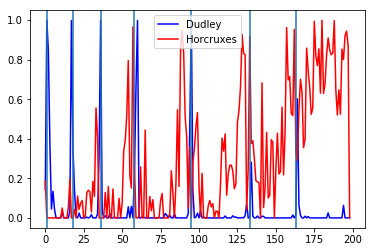

In [16]:
import matplotlib.pyplot as plt

plt.plot(theta[:,dudley_topic-1],color='blue',label="Dudley")
plt.plot(theta[:,horcrux_topic-1],color='red',label="Horcruxes")
for element in newBookChapter:
    plt.axvline(element)
plt.legend()
plt.show()

It is very interesting to see that the Dudley topic appears at the beggining of every book as every book start with Harry being with his adoptive family. We can clearly see too that the Horcrux topic appear at the end of the second book, when Harry destroys an Horcrux ( the snake and gets the sword ), and that this topic has higher probability at the end, when he intends to destroy all Horcruxes.
<br>
<br>
Let us now explore the chapters at which the Horcrux topic and the Dudley topic are maximum :
<br>
<br>
**Horcrux topic**

In [17]:
max_probability_horcrux_chapter = np.argmax(theta[:,horcrux_topic-1])+1

print "The Horcrux topic has maximum probability density for the chapter :",max_probability_horcrux_chapter,"(",getChapter(max_probability_horcrux_chapter),")","\n"

def show_words(lda,ivoc,number_words=10,chosenTopic=0):
    for k,topic in enumerate(lda.components_):
        if k==(chosenTopic-1):
            words = [str(ivoc[i]) for i in topic.argsort()[::-1][:number_words]]
            for word in words:
                print word+",",

print "The 50 main words in it are :","\n"
show_words(lda,ivoc,50,horcrux_topic)

The Horcrux topic has maximum probability density for the chapter : 181 ( Book 7 Chapter 19 THE SILVER DOE ) 

The 50 main words in it are : 

kreacher, bellatrix, master, wormtail, sword, eater, snake, luna, horcrux, fleur, goblin, lucius, severus, locket, plan, mark, sister, lily, tent, tom, figure, die, phoenix, hollow, tonks, trees, protection, kingsley, cast, surface, scream, riddle, brother, james, thoughts, basin, lake, godric, fighting, objects, horcruxes, pensieve, ring, frightened, drawing, invisible, elf, echoed, understood, tree,


Let us now view the corresponding document :


In [18]:
wordTopic={}
for k,topic in enumerate(lda.components_):
    if k==(horcrux_topic-1):
        arr = [str(ivoc[i]) for i in topic.argsort()[::-1][:500]]
        for word in arr:
            wordTopic[word]=k
with open (files[max_probability_horcrux_chapter-1]) as fin:
    for line in fin.readlines():
        words = line.split()
        for word in words:
            if word.lower() in wordTopic:
                print highlight(topicToColor[wordTopic[word.lower()]],word),
            else:
                print word,

It was snowing by the time Hermione took over the watch at midnight. Harry's dreams were confused and disturbing: Nagini wove in and out of them, first through a gigantic, cracked ring, then through a wreath of Christmas roses. He woke repeatedly, panicky, convinced that somebody had called out to him in the distance, imagining that the wind whipping around the tent was footsteps or voices. Finally he got up in the darkness and joined Hermione, who was huddled in the entrance to the tent reading A History of Magic by the light of her wand. The snow was still falling thickly, and she greeted with relief his suggestion of packing up early and moving on. “Well go somewhere more sheltered,” she agreed, shivering as she pulled on a sweatshirt over her pajamas. “I kept thinking I could hear people moving outside. I even thought I saw somebody once or twice.” Harry paused in the act of pulling on a jumper and glanced at the silent, motionless Sneakoscope on the table. “I'm sure I imagined it,

at Ron, half expecting him to have disappeared every time he lost sight of him, and yet he had to be real: He had just dived into the pool, he had saved Harry's life. “It was y-you?” Harry said at last, his teeth chattering, his voice weaker than usual due to his near-strangulation. “Well, yeah,” said Ron, looking slightly confused. “Y-you cast that doe?” “What? No, of course not! I thought it was you doing it!” “My Patronus is a stag.” “Oh yeah. I thought it looked different. No antlers.” Harry put Hagrid's pouch back around his neck, pulled on a final sweater, stooped to pick up Hermione's wand, and faced Ron again. “How come you're here?” Apparently Ron had hoped that this point would come up later, if at all. “Well, I've — you know — I've come back. If — ” He cleared his throat. “You know. You still want me.” There was a pause, in which the subject of Ron's departure seemed to rise like a wall between them. Yet he was here. He had returned. He had just saved Harry's life. Ron looke

vanished; torturing Ron had been its final act. The sword clanged as Ron dropped it. He had sunk to his knees, his head in his arms. He was shaking, but not, Harry realized, from cold. Harry crammed the broken locket into his pocket, knelt down beside Ron, and placed a hand cautiously on his shoulder. He took it as a good sign that Ron did not throw it off. “After you left,” he said in a low voice, grateful for the fact that Ron's face was hidden, “she cried for a week. Probably longer, only she didn't want me to see. There were loads of nights when we never even spoke to each other. With you gone ...” He could not finish; it was only now that Ron was here again that Harry fully realized how much his absence had cost them. “She's like my sister,” he went on. “I love her like a sister and I reckon she feels the same way about me. It's always been like that. I thought you knew.” Ron did not respond, but turned his face away from Harry and wiped his nose noisily on his sleeve. Harry got t

The chapter corresponds well to the topic as it is the time when Voldmort plans for creating the Horcruxes. Let us now look at the other topic :
<br>
<br>
**Dudley topic**

In [19]:
max_probability_dudley_chapter = np.argmax(theta[:,dudley_topic-1])+1

print "The Dudley topic has maximum probability density for the chapter :",max_probability_dudley_chapter,"(",getChapter(max_probability_dudley_chapter),")","\n"

def show_words(lda,ivoc,number_words=10,chosenTopic=0):
    for k,topic in enumerate(lda.components_):
        if k==(chosenTopic-1):
            words = [str(ivoc[i]) for i in topic.argsort()[::-1][:number_words]]
            for word in words:
                print word+",",

print "The 50 main words in it are :","\n"
show_words(lda,ivoc,50,dudley_topic)

The Dudley topic has maximum probability density for the chapter : 96 ( Book 5 Chapter 2 A PECK OF OWLS ) 

The 50 main words in it are : 

uncle, vernon, dudley, aunt, petunia, dursleys, kitchen, car, drive, privet, birthday, letters, cupboard, hedwig, dementors, mustache, bedroom, owls, cage, fireplace, crash, trunk, holidays, snake, sister, tea, cousin, questions, food, dementor, hang, gang, underage, addressed, form, mundungus, favorite, mail, furious, received, street, barked, garden, cat, warning, witchcraft, write, coat, loose, tongue,


Let us now view the corresponding document :

In [20]:
wordTopic={}
for k,topic in enumerate(lda.components_):
    if k==(dudley_topic-1):
        arr = [str(ivoc[i]) for i in topic.argsort()[::-1][:500]]
        for word in arr:
            wordTopic[word]=k
with open (files[max_probability_dudley_chapter-1]) as fin:
    for line in fin.readlines():
        words = line.split()
        for word in words:
            if word.lower() in wordTopic:
                print highlight(topicToColor[wordTopic[word.lower()]],word),
            else:
                print word,

“What?” said Harry blankly. “He left!” said Mrs. Figg, wringing her hands. “Left to see someone about a batch of cauldrons that fell off the back of a broom! I told him I'd flay him alive if he went, and now look! Dementors! It's just lucky I put Mr. Tibbies on the case! But we haven't got time to stand around! Hurry, now, we've got to get you back! Oh, the trouble this is going to cause! I will kill him!” “But — ” The revelation that his batty old cat-obsessed neighbor knew what dementors were was almost as big a shock to Harry as meeting two of them down the alleyway. “You're — you're a witch?” “I'm a Squib, as Mundungus knows full well, so how on earth was I supposed to help you fight off dementors? He left you completely without cover when I warned him — ” “This bloke Mundungus has been following me? Hang on — it was him). He Disapparated from the front of my house!” “Yes, yes, yes, but luckily I'd stationed Mr. Tibbies under a car just in case, and Mr. Tibbies came and warned me, 

Uncle Vernon's anguished yell of “OWLS!” Harry crossed the room at a run and wrenched the window open again. The owl stuck out its leg, to which a small roll of parchment was tied, shook its feathers, and took off the moment Harry had pulled off the letter. Hands shaking, Harry unfurled the second message, which was written very hastily and blotchily in black ink. Harry — Dumbledore's just arrived at the Ministry, and he's trying to sort it all out. DO NOT LEAVE YOUR AUNT AND UNCLE'S HOUSE. DO NOT DO ANYMORE MAGIC. DO NOT SURRENDER YOUR WAND. Arthur Weasley Dumbledore was trying to sort it all out... What did that mean? How much power did Dumbledore have to override the Ministry of Magic? Was there a chance that he might be allowed back to Hogwarts, then? A small shoot of hope burgeoned in Harry's chest, almost immediately strangled by panic — how was he supposed to refuse to surrender his wand without doing magic? He'd have to duel with the Ministry representatives, and if he did that

Uncle Vernon nastily. “Well, if that's all,” said Harry, getting to his feet. He was desperate to be alone, to think, perhaps to send a letter to Ron, Hermione, or Sirius. “NO, IT RUDDY WELL IS NOT ALL!” bellowed Uncle Vernon. “SIT BACK DOWN!” “What now?” said Harry impatiently. “DUDLEY!” roared Uncle Vernon. “I want to know exactly what happened to my son!” “FINE!” yelled Harry, and in his temper, red and gold sparks shot out of the end of his wand, still clutched in his hand. All three Dursleys flinched, looking terrified. “Dudley and I were in the alleyway between Magnolia Crescent and Wisteria Walk,” said Harry, speaking fast, fighting to control his temper. “Dudley thought he'd be smart with me, I pulled out my wand but didn't use it. Then two dementors turned up — ” “But what ARE dementoids?” asked Uncle Vernon furiously. “What do they DO?” “I told you — they suck all the happiness out of you,” said Harry, “and if they get the chance, they kiss you “Kiss you?” said Uncle Vernon, 

swelling, his great purple face stretching before Harry's eyes. “Well, that settles it,” he said, his shirt front straining as he inflated himself, “you can get out of this house, boy\” “What?” said Harry. “You heard me — OUT!” Uncle Vernon bellowed, and even Aunt Petunia and Dudley jumped. “OUT! OUT! I should've done it years ago! Owls treating the place like a rest home, puddings exploding, half the lounge destroyed, Dudley's tail, Marge bobbing around on the ceiling, and that flying Ford Anglia — OUT! OUT! You've had it! You're history! You're not staying here if some loony's after you, you're not endangering my wife and son, you're not bringing trouble down on us, if you're going the same way as your useless parents, I've had it! OUT!” Harry stood rooted to the spot. The letters from the Ministry, Mr. Weasley, and Sirius were crushed in his left hand. Don't leave the house again, whatever you do. DO NOT LEA VE YOUR A UNT AND UNCLE'S HOUSE. “You heard me!” said Uncle Vernon, bending

The results are very coherent with the chapter as the chapter mainly focus on Harry's relations with his adoptive family.

## A WORD CLOUD VISUALIZATION##
<br>
We will finish by creating a word cloud for the two previous chapters and the whole Harry Potter Book serie
<br>
<br>
**Horcrux chapter**

In [21]:
! pip install WordCloud

In [22]:
def showWordCloud(text_files):
    from os import path
    from wordcloud import WordCloud, STOPWORDS

    # Read the whole text.
    text = ""
    for chapter in text_files:
        text = open(chapter).read() + text

    # Add stopwords
    stopwords=set(STOPWORDS)
    stopwords.add("said")
    
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords,max_font_size=50,background_color="white",random_state=3).generate(text)

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
    plt.figure( figsize=(10,5) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


**Horcrux Topic**

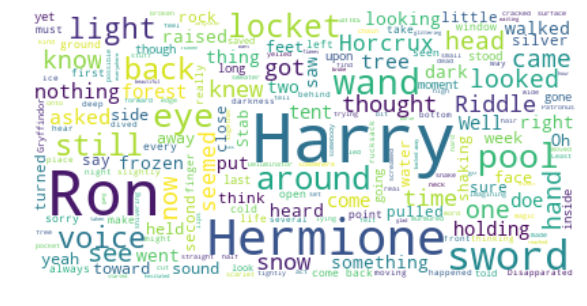

In [23]:
showWordCloud([files[max_probability_horcrux_chapter-1]])

**Dudley Topic**

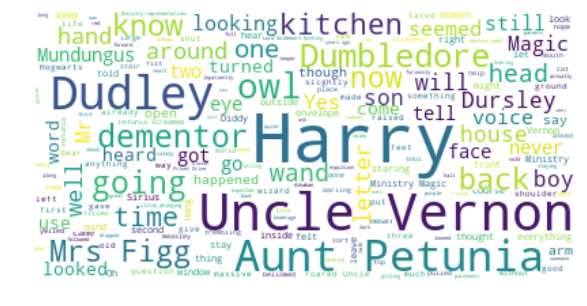

In [24]:
showWordCloud([files[max_probability_dudley_chapter-1]])

**Harry Potter Serie**

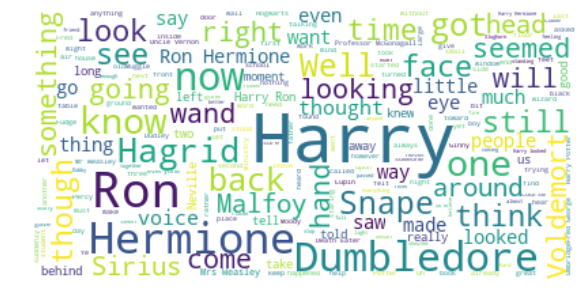

In [25]:
showWordCloud(files)

## Conclusion ##
<br>
    I personally thought topic modelling worked really well on the Harry Potter serie. It was really interesting and stimulating to do it on this book as for people who know the universe of Harry Potter, the topics discovered make a lot of sense. I personally enjoyed this lab a lot. I would then have been interesting to test the influence in the number of documents for LDA. Indeed, I could qualitatively see that the topics were much more relevant with more documents ( more books and chapters ). I started only studying the Book 1 but ended adding them all as topics were becoming more and more relevant. The preprocessing part took a lot of time in this lab as the data had to be built from scratch. Tweaking the LDA to have relevant topics took also a lot of time as the hyperparameters must be well set. Considering is is a randomized algorithm, I tried changing the random seed for a long time. Thanks for reading this lab !